In [6]:
import numpy as np 

<h2>A delicious Markov Chain</h2>

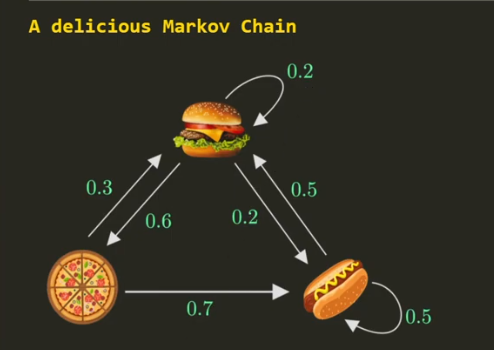

In [7]:
state = { 
    0 : "Burger", 
    1 : "Pizza", 
    2 : "Hotdog"    
}
state

{0: 'Burger', 1: 'Pizza', 2: 'Hotdog'}

<h3>Transition matrix </h3>

![Alt text](image-1.png)

<i>A_ij = P( X_n = j | X_n-1 = i ) </i>

In [8]:
A = np.array([
    [0.2, 0.6, 0.2], 
    [0.3, 0.0, 0.7], 
    [0.5, 0.0, 0.5]
])

A

array([[0.2, 0.6, 0.2],
       [0.3, 0. , 0.7],
       [0.5, 0. , 0.5]])

<h3>Random Walk on Markov Chain </h3>

In [9]:
n = 15 
start_state = 0 #Burger
print(state[start_state], "--->", end=" ")
prev_state = start_state 

while n-1: 
    curr_state = np.random.choice([0, 1, 2], p=A[prev_state]) #p=[prev, choiced]
    print(state[curr_state], "--->", end=" ")
    prev_state = curr_state
    n-=1
print("stop")
    

Burger ---> Hotdog ---> Burger ---> Pizza ---> Hotdog ---> Hotdog ---> Hotdog ---> Hotdog ---> Hotdog ---> Hotdog ---> Hotdog ---> Burger ---> Pizza ---> Hotdog ---> Hotdog ---> stop


<h3>Approach 1 : Monte Carlo </h3>

In [10]:
steps = 10**6
start_state = 0 
pi = np.array([0, 0, 0])
pi[start_state] = 1
prev_state = start_state 

i = 0 
while i<steps: 
    curr_state = np.random.choice([0,1,2], p=A[prev_state])
    pi[curr_state] += 1
    prev_state = curr_state
    i += 1

print("pi = ", pi/steps)


pi =  [0.352626 0.211143 0.436232]


<h3>Approach 2 : Repeated Matrix Multiplication </h3>

In [11]:
steps = 10**3 
A_n = A 

i=0 
while i<steps: 
    A_n = np.matmul(A_n, A)
    i+=1

print("A^n = \n", A_n, "\n")
print("pi = ", A_n[0])

A^n = 
 [[0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]] 

pi =  [0.35211268 0.21126761 0.43661972]


<h3>Approach 3: Finding Left Eigen Vectors</h3>

In [12]:
import scipy.linalg 
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)


left eigen vectors = 
 [[-0.58746336+0.j         -0.16984156-0.35355339j -0.16984156+0.35355339j]
 [-0.35247801+0.j          0.67936622+0.j          0.67936622-0.j        ]
 [-0.72845456+0.j         -0.50952467+0.35355339j -0.50952467-0.35355339j]] 

eigen values = 
 [ 1.  +0.j        -0.15+0.3122499j -0.15-0.3122499j]


por que son negativos? recordemos que existe la segunda condicion que la distribucion estacionaria debe cumplir: <br>
    <i>"the elements of pi should add up to 1"</i>


In [13]:
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]

pi_normalized

[0.3521126760563379, 0.21126760563380298, 0.43661971830985913]

<h3> P(Pizza --> Hotdog --> Hotdog --> Burger) = ??? </h3> <br>
<b>=> P(X_0 = Pizza, X_1 = Hotdog, X_2 = Hotdog, X_3 = Burger) <br>
=> P(X_0 = Pizza) P(X_1 = Hotdog | X_0 = Pizza) P(X_2 = Hotdog | X_1 = Hotdog) P(X_3 = Burger | X_2 = Hotdog)</b>

In [14]:
def find_prob(seq, A, pi): 
    start_state = seq[0]
    prob = pi[start_state]
    prev_state = start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob 

print(find_prob([1, 2, 2, 0], A, pi_normalized))

0.03697183098591552
